In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import os
path = 'C://Users//paarv//OneDrive - University of Illinois - Urbana//Desktop//IE 529//Hw'
os.chdir(path)

In [3]:
df = pd.read_csv("ShapedData.csv", header=None)
df.columns = ['x', 'y']
data = np.array(df)

In [4]:
print("Total Number of data points: ", len(df))

Total Number of data points:  4460


In [5]:
data

array([[ 2.1865 , -1.226  ],
       [ 5.9486 , -2.3155 ],
       [ 4.9435 , -2.7735 ],
       ...,
       [ 3.8899 ,  1.9704 ],
       [ 4.5981 ,  1.1191 ],
       [-0.57903, -4.1041 ]])

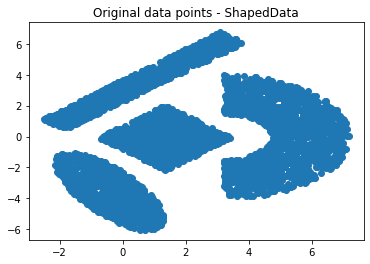

In [7]:
# Scatter plot of the original data
plt.scatter(df['x'], df['y'])
plt.title('Original data points - ShapedData')
plt.show()

# Lloyd's Algorithm
Steps:
1. Initialize K - random data points as centroids
2. Assign each data point in the data into one of those K centroids using 2-norm
3. Calculate the new centroids, which are just mean of the data points assigned to those K centroids
4. Replace old centorids with new centorids till they converge (cost function no more reduces)

In [8]:
def centroid_intialization(K, data):
    random.seed(23)
    KCentroidIndices = random.sample(range(0, len(data)), K)
    KCentroids = data[KCentroidIndices]
    return KCentroids

def cost_function(centers_, data): # WCSS with 2 norm (Eucl. distance)
    totCost = 0
    for clusterName, clusterChars in centers_.items(): # clusterChars is a list of lists, [ [centroid],[itsClusterptsIds] ]
        clusterCentroid = clusterChars[0]
        clusterPtIndices = clusterChars[1]
        totCost += totCost + np.sum(np.sum((data[clusterPtIndices] - clusterCentroid)**2))
    return totCost

def eucl_dist(centroid, other_pt_in_clust):
    return np.sum((centroid - other_pt_in_clust)**2)

In [15]:
# Set seed
random.seed(23)
random.sample(range(2, 100), 7)

[39, 12, 4, 77, 41, 56, 50]

In [96]:
# Step 1
K = 2
Centorids = centroid_intialization(K=K, data=data)
print(Centorids)

[[ 4.1355 -1.8417]
 [ 2.0181 -1.0868]]


In [97]:
# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print(centers_)
print(centers_.items())

{0: [[array([ 4.1355, -1.8417])], []], 1: [[array([ 2.0181, -1.0868])], []]}
dict_items([(0, [[array([ 4.1355, -1.8417])], []]), (1, [[array([ 2.0181, -1.0868])], []])])


In [98]:
centers_

{0: [[array([ 4.1355, -1.8417])], []], 1: [[array([ 2.0181, -1.0868])], []]}

In [103]:
cost = np.inf
tolerance = 1e-5

# Step 1
K = 3
Centorids = centroid_intialization(K=K, data=data)
print(Centorids)
print()

# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print(centers_)
print(centers_.items())

def lloyds_algorithm_other(centers_=centers_, data=data, tolerance=tolerance, cost=cost):
    while True:
        for key in centers_.keys():
            centers_[key][1] = []

        for id_, pt in enumerate(data):
            distances = []
            for center in centers_.keys():
                centroid = centers_[center][0]
                dist = eucl_dist(centroid = centroid, other_pt_in_clust = pt)
                #print(dist)
                distances.append(dist) 
            minDist = np.min(distances)
            minDistIdx = np.argmin(distances)
            #print(minDistIdx)
            centers_[minDistIdx][1].append(id_)

        for center in centers_.keys():
            thisClustIdxs = centers_[center][1]
            centers_[center][0] = np.mean(data[thisClustIdxs], axis=0)
            #print(centers_)

        new_cost = cost_function(centers_,data)

#         if new_cost >= cost:
#             #print(np.abs(new_cost - cost))
#             #print('Convergence reached!')
        if np.abs(new_cost - cost) <=0.00001:
            break
        cost = new_cost
        #print('WCSS: ', cost)

    print('Final Cost: ', cost)
    return cost, centers_, thisClustIdxs 

[[ 4.1355 -1.8417]
 [ 2.0181 -1.0868]
 [ 1.7842  1.1768]]

{0: [[array([ 4.1355, -1.8417])], []], 1: [[array([ 2.0181, -1.0868])], []], 2: [[array([1.7842, 1.1768])], []]}
dict_items([(0, [[array([ 4.1355, -1.8417])], []]), (1, [[array([ 2.0181, -1.0868])], []]), (2, [[array([1.7842, 1.1768])], []])])


In [104]:
cost = np.inf
tolerance = 1e-5
cost, centers_, thisClustIdxs = lloyds_algorithm_other(centers_=centers_, data=data, tolerance=tolerance, cost=cost)

Final Cost:  47683.84041966412


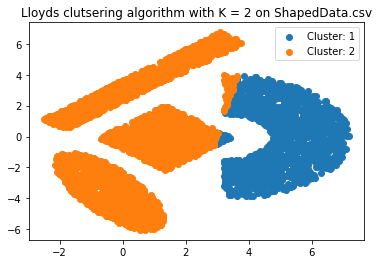

In [94]:
for cluster_id in centers_.keys():
    indexes = centers_[cluster_id][1]
    plt.scatter(data[indexes][:, 0], data[indexes][:, 1], label='Cluster: ' + str(cluster_id + 1))
    plt.legend()
plt.title('Lloyds clutsering algorithm with K = 2 on ShapedData.csv')
plt.show()

In [29]:
# string = ''
# for val in centers_[3][1]:
#     string+= str(val) + str(', ')
# string

# Greedy K Centers intialization and clustering (Kmeans++)

# Steps
1. Initialize the K 
2. Take any random point - c1
3. Compute the farthest away point from this random point - c2
4. Now, you have 2 points, C = {c1, c2}
5. Take the third point such that after assigning each point to the nearest center from C, find the maximum distance
6. Repeat step 5 till all the K points are obtained.

In [36]:
# Step 1
K = 4

In [37]:
np.argmax(np.array([[1,4,5],
         [4,69, 9]]))

4

In [38]:
np.min(
    np.array(
    [[1,4,5],
    [4,69, 9]]
)
, axis=0)

array([1, 4, 5])

In [105]:
# Step 2
import random

def calc_eucl_dist(x1, x2):
    eucl_dist = np.sum((x1 - x2)**2)
    return eucl_dist

def find_max_min(kCenterIds, data):
    
    distances = []
    for centerId in kCenterIds:
        dists = []
        center = data[centerId]
        for idx, pt in enumerate(data):
            if idx == centerId:
                #pass
                dist = np.inf
            dist = calc_eucl_dist(pt, center)
            dists.append(dist)
        distances.append(dists)
    distancesArr = np.array(distances)
    minDistToClusters = np.min(distancesArr, axis=0) #Assigning each point to nearest cluster based on distances(see above cell)
    #print(minDistToClusters)
    maxPtIdx = np.argmax(minDistToClusters)
    #print(maxPtIdx) 
    return maxPtIdx, len(dists)

def generate_k_points(K, data):
    kCenterIds = []
    random.seed(23)
    kCenterIds.append(random.randint(0, len(data)))
    if K <= 0:
        print('K is not Valid')
    else:
        if K==1:
            return kCenterIds
        else:
            for i in range(K-1):
                newPt, l = find_max_min(kCenterIds, data)
                #print(l)
                kCenterIds.append(newPt)
                #print(kCenterIds)
    return kCenterIds

In [120]:
K = 2
kCenters = generate_k_points(K = K, data = data)
kCenters

[2374, 2577]

In [121]:
data[kCenters]

array([[ 4.1355, -1.8417],
       [ 3.0811,  6.7565]])

In [122]:
def plot_pts(kCenters, data):
    plt.figure(figsize=(7,5))
    plt.scatter(data[:, 0], data[:, 1])
    for idx in kCenters: 
        plt.scatter(data[idx, 0], data[idx, 1], color='red')
    plt.title('Red points denote the K-centers for ShapedData.csv when K=4')
    return plt.show()

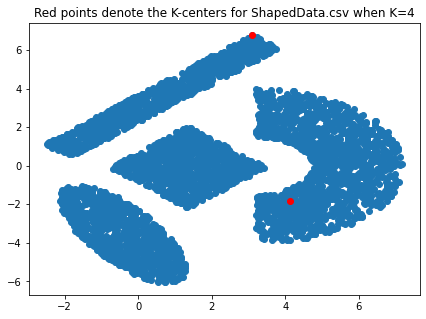

In [123]:
plot_pts(kCenters, data)

In [124]:
Centorids = data[kCenters]
Centorids

array([[ 4.1355, -1.8417],
       [ 3.0811,  6.7565]])

In [125]:
# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print(centers_)
print(centers_.items())

{0: [[array([ 4.1355, -1.8417])], []], 1: [[array([3.0811, 6.7565])], []]}
dict_items([(0, [[array([ 4.1355, -1.8417])], []]), (1, [[array([3.0811, 6.7565])], []])])


In [126]:
cost = np.inf
tolerance = 1e-5

cost, centers_, thisClustIdxs = lloyds_algorithm_other(centers_, data, tolerance, cost)
print()
print('Cost after K-centers is: ', cost)
#print('Centers: ', centers_)

Final Cost:  52452.2778802771

Cost after K-centers is:  52452.2778802771


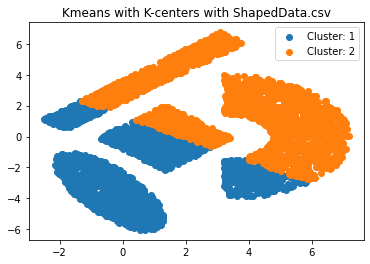

In [127]:
for cluster_id in centers_.keys():
    indexes = centers_[cluster_id][1]
    plt.scatter(data[indexes][:, 0], data[indexes][:, 1], label = 'Cluster: ' + str(cluster_id +1))
    plt.legend()
plt.title('Kmeans with K-centers with ShapedData.csv')
plt.show()

# K - Medians Swap

In [ ]:
K = 5
kCenters = generate_k_points(K = K, data = data)
kCenters

In [ ]:
Centorids = data[kCenters]
Centorids

In [ ]:
# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print(centers_)
print(centers_.items())

In [ ]:
def plot_pts(kCenters, data):
    plt.figure(figsize=(10,10))
    plt.scatter(data[:, 0], data[:, 1])
    for idx in kCenters: 
        plt.scatter(data[idx, 0], data[idx, 1], color='red')
    return plt.show()

In [ ]:
plot_pts(kCenters, data)

In [ ]:
def find_distance_matrix(kCenters,data):
    distance_matrix = [[np.sum((data[i] - data[j])**2)  for i in kCenters for  j in range(len(data))]]
    return distance_matrix

def median_swal_algorithm(kCenters, data):
    kCenters_swap = kCenters
    for center in kCenters:
        kCenters_swap.remove(center)
        distance_matrix = find_distance_matrix(kCenters_swap, data) 
        
    return

In [ ]:
median_swal_algorithm(kCenters, data)

# Spectral clustering


# Steps
1. Initialize k for k-nearest neighbors, let us say k=5 and sigma = 0.1
2. Initialize the empty matrix of N x N where N = # of data points
3. Find the k-nearest neighbours and find the similarities by using the metric
        𝑒xp(||𝑥𝑖−𝑥𝑗||2)2 and fill the empty spaces with the appropriate places
4. This matrix is called the similarity matrix or the adjacency matrix, A
5. Create a diagonal matrix D with each element being the sum of each row of A
6. Now, the laplacian matrix L = D - A
7. Find the Eigen values and Eigen vectors of L
8. Determine the number of clusters, K  
9. Select the K smallest eigen values and their associated eigen vectors
10. Put all these eigen vectors together in columns and this matrix would be U
11. Now, Apply K-Means clustering to the matrix U and find those K clusters


In [63]:
def guassian_similairty_fn(current_pt, data, sigma, k):
    norm2 = np.sum((current_pt - data)**2, axis=1)
    const = -1/(2*sig**2)
    similarities = np.exp(const * norm2)
    #print(similarities)
    kIndices = np.argsort(similarities)[::-1][1:k+1] # dont take 0 index as it is the distance of the pt to itself
    #print('K Indices: ', kIndices)
    kDistances = similarities[kIndices]
    #print('K Similarities: ', kDistances)
    return kIndices, kDistances

In [73]:
# Step 1
N = len(data)
k = 10
sig = 1

# Step 2
A = np.zeros((N, N))

for idx, pt in enumerate(data):
    kNearestIndices, kNearestDists = guassian_similairty_fn(current_pt = pt, data =data, sigma = sig, k=k)
    A[idx][kNearestIndices] = kNearestDists

A = A + np.multiply(A.T,(A == 0).astype(int))

# To check for symmetricity
print('Is matrix A symmetrical: ', (A==A.T).all())

# Step 5
D_values = A.sum(axis=1)
D = np.diag(D_values)

# Step 6
L = D - A

# Step 7
c = 4    # 4 clusters
(eigenVals, eigenVects) = np.linalg.eig(L)
Kindices = np.argsort(eigenVals)[:c]
KeigenVals = eigenVals[Kindices]
KeigenVects = eigenVects[:,Kindices]

print(Kindices)
print()
print('U  = ', KeigenVals)
print()
print(KeigenVects)

# Step 1
K = 4 # No. of clusters
Centorids = centroid_intialization(K=K, data=KeigenVects)
print()
print('Centorids : ', Centorids)

# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print('Centers : ', centers_)
print('Center Items : ', centers_.items())

Is matrix A symmetrical:  True
[21 15 20 22]

U  =  [1.59843692e-15 2.12159330e-15 2.18356440e-15 1.27486668e-14]

[[ 1.11355475e-03 -3.16224071e-02 -1.08395517e-02 -3.80697965e-05]
 [ 1.82753080e-03 -8.08076913e-05  9.14701692e-03 -1.91325841e-02]
 [ 1.82753080e-03 -8.08076913e-05  9.14701692e-03 -1.91325841e-02]
 ...
 [ 1.82753080e-03 -8.08076913e-05  9.14701692e-03 -1.91325841e-02]
 [ 1.82753080e-03 -8.08076913e-05  9.14701692e-03 -1.91325841e-02]
 [ 1.21796548e-02  1.14936019e-04 -6.25437672e-04 -1.80366302e-02]]

Centorids :  [[ 1.82753080e-03 -8.08076913e-05  9.14701692e-03 -1.91325841e-02]
 [ 1.11355475e-03 -3.16224071e-02 -1.08395517e-02 -3.80697965e-05]
 [ 1.11355475e-03 -3.16224071e-02 -1.08395517e-02 -3.80697965e-05]
 [ 1.11355475e-03 -3.16224071e-02 -1.08395517e-02 -3.80697965e-05]]
Centers :  {0: [[array([ 1.82753080e-03, -8.08076913e-05,  9.14701692e-03, -1.91325841e-02])], []], 1: [[array([ 1.11355475e-03, -3.16224071e-02, -1.08395517e-02, -3.80697965e-05])], []], 2: [[a

In [66]:
print('Weighted Adjacency matrix \n A = \n', A)

Weighted Adjacency matrix 
 A = 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Clusters: [0 1 1 ... 1 1 3]
4460


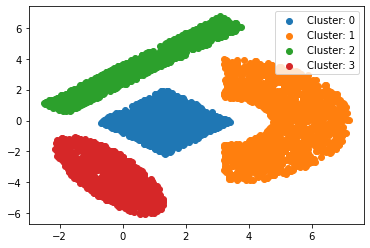

In [70]:
# Spectral clustering
# the eigen vectors corresponding to the k smallest eigen values are clustered by K means/Lloyd's algorithm
cost = np.inf
tolerance = 1e-5

cost, centers_, thisClustIdxs = lloyds_algorithm_other(centers_=centers_, data=KeigenVects, tolerance=tolerance, cost=cost)

for idx in centers_.keys():
    plt.scatter(data[:, 0][centers_[idx][1]], data[:, 1][centers_[idx][1]], label = 'Cluster: ' + str(idx))
    plt.legend()
plt.show()

Clusters: [2 3 3 ... 3 3 1]
4460


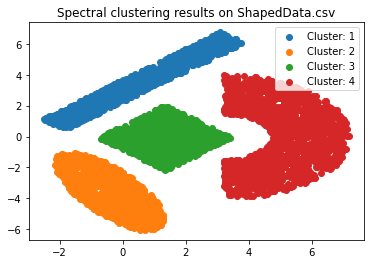

In [133]:
# Compare with standard sklearn package

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=c)
kmeans.fit(KeigenVects)
colors = kmeans.labels_

print("Clusters:", colors)
print(len(colors))
# Clusters: [2 1 1 0 0 0 3 3 2 2]

for color in np.unique(colors):
    plt.scatter(data[:, 0][colors==color], data[:, 1][colors==color], label = 'Cluster: ' + str(color+1))
    plt.legend()
plt.title('Spectral clustering results on ShapedData.csv')
plt.show()

### Both produces same results

# K Medians Swap Algorithm

Steps:
1. Run kcenters algorithm to get Q, cost(previous).
2. initial distance matrix of shape (samples, clusters)
3. update distance matrix’s columns (which are clusters) as euclidean distance between X and centroid of each cluster.
4. max_D as max of min of distance

5. Run a loop for each cluster (i)
    : if i is the first cluster, get min of distance[:, 0:]
    : if i is the last cluster, get min of distance[:, :-1]
    : if i is the cluster between first and last cluster, 
            mimimum distance is either min of distance[:, :i] or min of distance[:, (i+1):]

- (Still inside loop)
6. boolean to store if we found a better swap.

7. For all samples j
- get euclidean distance between all samples and jth observation. (euc_dist)
- get max of (min of (min_distance (if loops), euc_dist)). — max_d
- if max_d/max_D is less than 1-tau, update the ith row of Q with the observation that minimises the minimum distance, update the ith column of distance matrix as euc_dist, update boolean, update max_D as max_d

8. Increment the cluster i.
- If we have not found the swap and if you have reached the last cluster, break else increment i by 1.
- If we found a swap and i is exhausted, start again (ie i=0)

9. Update C to get argmin of distance

10. Return the distance matrix, C and costs.


In [135]:
import numpy as np

tau = 0.05
K = 4

# Initialize K centroids using Greedy K centers algorithm
kCenters = generate_k_points(K = K, data = data)
centroids = kCenters.copy()
centroids_copy = centroids.copy()
X = np.asmatrix(data).copy()

def obj_func(distance_matrix,centroid,non_centroids_copy):
#     print(np.sum(np.square(X[non_centroids_copy,:] - X[centroid,:]),axis = 1))
    distance_matrix = np.hstack([distance_matrix, np.sum(np.square(X[non_centroids_copy,:] - X[centroid,:]),axis = 1)])
#     print(np.square(X[non_centroids_copy,:] - X[centroid,:]))
#     print(distance_matrix)
    distance_matrix = np.min(distance_matrix,axis = 1)
    
    return np.sum(distance_matrix)

points = list(range(len(X)))
    
for centroid in centroids:
    
    centroids_copy.remove(centroid)
    non_centroids = [i for i in points if i not in centroids_copy] 
    optimal_centroids = centroids_copy
    optimal_non_centroids = non_centroids.copy()
    
    distance_matrix = np.sum(np.square(X[non_centroids,:] - X[centroid,:]),axis = 1)
    
    for centroid in centroids_copy[1:]:
        distance_matrix = np.hstack([distance_matrix,np.sum(np.square(X[non_centroids,:] - X[centroid,:]),axis= 1)])
        distance_matrix = np.min(distance_matrix,axis = 1)
    
    non_centroids_copy = non_centroids.copy()
    new_loss = np.sum(distance_matrix)
    
    for non_centroid in non_centroids:
        
        #non_centroids_copy.remove(centroid)
        loss = obj_func(distance_matrix,non_centroid,non_centroids_copy)
        
        if loss < new_loss*(1-tau):
            
            new_loss = loss
            optimal_centroids = centroids_copy.copy() + [non_centroid]

            print("\nnew centroids ")
            print(optimal_centroids)
        
        non_centroids_copy = non_centroids.copy()
        

    centroids_copy = optimal_centroids.copy()

def get_cluster_assignment(X):
    cluster_assigned = np.apply_along_axis(self.nearest_cluster,arr = X,axis = 1)
    return X,cluster_assigned


new centroids 
[2577, 912, 2214, 0]

new centroids 
[2577, 912, 2214, 3]

new centroids 
[2577, 912, 2214, 7]

new centroids 
[2577, 912, 2214, 11]

new centroids 
[912, 2214, 11, 0]

new centroids 
[912, 2214, 11, 44]

new centroids 
[2214, 11, 44, 0]

new centroids 
[2214, 11, 44, 5]

new centroids 
[2214, 11, 44, 8]

new centroids 
[2214, 11, 44, 13]

new centroids 
[11, 44, 13, 1]

new centroids 
[11, 44, 13, 3]

new centroids 
[11, 44, 13, 19]

new centroids 
[11, 44, 13, 25]

new centroids 
[11, 44, 13, 48]


In [136]:
optimal_centroids

[11, 44, 13, 48]

In [137]:
data[optimal_centroids]

array([[ 3.2516 ,  3.9068 ],
       [ 3.0439 , -0.3969 ],
       [ 0.35551, -3.1525 ],
       [ 1.1217 ,  3.9168 ]])